<a href="https://colab.research.google.com/github/TitoBotelho/ModeloKeras-Mario-v-Luigi/blob/main/Transfer%C3%AAncia_de_aprendizado_Mario_X_Luigi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transferência de Aprendizado: Utilizando uma rede neural já treinada para reconhecer o Mario e o Luigi
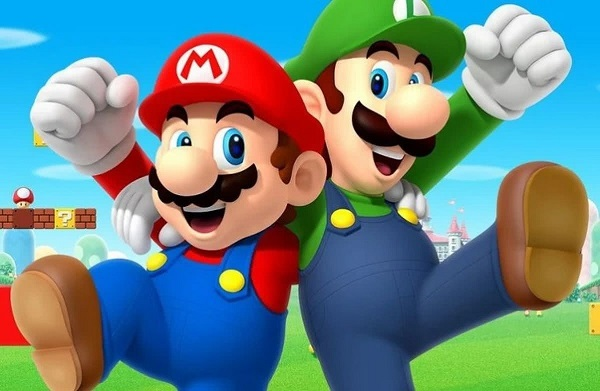

Este código foi desenvolvido tendo como base o código:

https://github.com/FlaysonSantos/Transfer-Learning-em-Python_br/blob/main/Cats_v_Dogs.ipynb

O objetivo é utilizar uma rede neural já existente e já treinada para ver se ela consegue fazer a diferenciação entre o Mario e o Luigi.

Este código é um exercício proposto pelo professor Diego Renan no curso de Machine Learning da plataforma DIO

In [ ]:
#importar as bibliotecas

import os
import zipfile #como a pasta não está zipada, esta biblioteca não é nescessária
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
try:
    os.mkdir('/tmp/mario-v-luigi')
    os.mkdir('/tmp/mario-v-luigi/training')
    os.mkdir('/tmp/mario-v-luigi/testing')
    os.mkdir('/tmp/mario-v-luigi/training/mario')
    os.mkdir('/tmp/mario-v-luigi/training/luigi')
    os.mkdir('/tmp/mario-v-luigi/testing/mario')
    os.mkdir('/tmp/mario-v-luigi/testing/luigi')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 #as pastas de treinamento estão no meu google drive.


MARIO_SOURCE_DIR = "/content/drive/MyDrive/MarioLuigi/Mario/"
TRAINING_MARIO_DIR = "/tmp/mario-v-luigi/training/mario/"
TESTING_MARIO_DIR = "/tmp/mario-v-luigi/testing/mario/"
LUIGI_SOURCE_DIR = "/content/drive/MyDrive/MarioLuigi/Luigi/"
TRAINING_LUIGI_DIR = "/tmp/mario-v-luigi/training/luigi/"
TESTING_LUIGI_DIR = "/tmp/mario-v-luigi/testing/luigi/"
 
split_size = .9
split_data(MARIO_SOURCE_DIR, TRAINING_MARIO_DIR, TESTING_MARIO_DIR, split_size)
split_data(LUIGI_SOURCE_DIR, TRAINING_LUIGI_DIR, TESTING_LUIGI_DIR, split_size)
# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [ ]:
print(len(os.listdir('/tmp/mario-v-luigi/training/mario/')))
print(len(os.listdir('/tmp/mario-v-luigi/training/luigi/')))
print(len(os.listdir('/tmp/mario-v-luigi/testing/mario/')))
print(len(os.listdir('/tmp/mario-v-luigi/testing/luigi/')))
# Expected output:
# 90
# 90
# 10
# 10

99
100
19
20


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "/tmp/mario-v-luigi/training"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
 
VALIDATION_DIR = "/tmp/mario-v-luigi/testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
 
# O modelo separa 90% das imagens para treinar e 10% para validar 
# Expected Output:
# Found 180 images belonging to 2 classes.
# Found 20 images belonging to 2 classes.

Found 199 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
#Aumentei o número de épocas de 5 para 50.
#A partir da época 30 o modelo apresentou uma acurácia de 100%
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
2/2 [==============================] - 8s 3s/step - loss: 7.6767 - acc: 0.4975 - val_loss: 15.5519 - val_acc: 0.5128
Epoch 2/50
2/2 [==============================] - 7s 3s/step - loss: 8.8549 - acc: 0.5025 - val_loss: 1.0491 - val_acc: 0.5128
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 0.8546 - acc: 0.5025 - val_loss: 0.6179 - val_acc: 0.5128
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 0.6098 - acc: 0.7035 - val_loss: 0.4763 - val_acc: 0.8718
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 0.4627 - acc: 0.8744 - val_loss: 0.5662 - val_acc: 0.6923
Epoch 6/50
2/2 [==============================] - 6s 3s/step - loss: 0.9808 - acc: 0.6382 - val_loss: 0.5544 - val_acc: 0.6667
Epoch 7/50
2/2 [==============================] - 6s 3s/step - loss: 0.5572 - acc: 0.7337 - val_loss: 0.4690 - val_acc: 0.7179
Epoch 8/50
2/2 [==============================] - 6s 3s/step - loss: 0.5178 - acc: 0.6131 - val_loss: 0.3981 -

<Figure size 432x288 with 0 Axes>

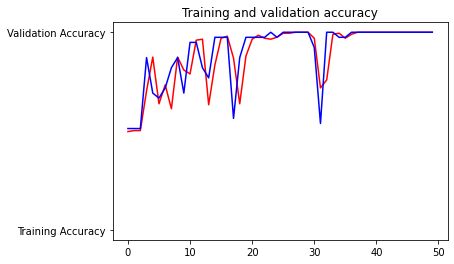

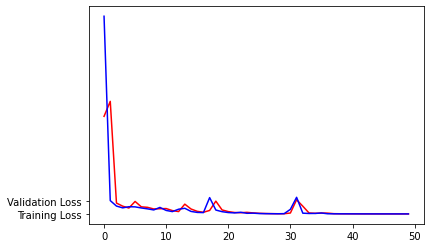

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras_preprocessing import image

 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "Este é o Mario")
  else:
    print(fn + "Este é o Luigi")

Saving Mario Teste 2.jpg to Mario Teste 2.jpg
1/1 [==============================] - 0s 29ms/step
[1.]
Mario Teste 2.jpg é o Mario
